# The manifold v1539(5,1)

In [1]:
import twisted_l2
import regina
import snappy

## Compute the chain complex of the universal cover:

In [5]:
twisted_l2.load_hap()

true

In [6]:
mfd = snappy.Manifold("v1539(5,1)")
tri = regina.Triangulation3(mfd.filled_triangulation())

In [5]:
fl = twisted_l2.regina_tri_to_face_lattice(tri, ideal=False)

In [6]:
cw = twisted_l2.cw_complex(fl)

In [7]:
number_of_cells = twisted_l2.gap_member(cw, "nrCells")
print("Number of cells in each dimension:")
for j in range(4):
    print(f"{j}: {number_of_cells(j)}")

Number of cells in each dimension:
0: 74
1: 506
2: 864
3: 432


In [8]:
%time chain_complex = twisted_l2.equivariant_cc(cw, gap=False)

CPU times: user 70.5 ms, sys: 171 µs, total: 70.7 ms
Wall time: 70.6 ms


In [9]:
[chain_complex.dimension(i) for i in range(5)]

[1, 2, 2, 1, 0]

In [10]:
G = twisted_l2.get_fundamental_group(chain_complex)

In [11]:
cc = twisted_l2.get_differentials(chain_complex)

The variable `chain_complex` wraps a GAP object,
while `cc` is simply a list of matrices over the group algebra of `G`. \
Actually, for technical reasons, we use the free group on the generators of `G` instead of `G` itself.

The above cell is equivalent to
```
cc = [twisted_l2.boundary_operator(chain_complex, i, G) for i in range(1, 4)]
```

## Or load precomputed data:

We can also save/load the group and chain complex.\
This is useful to deal with non-deterministic results from CW complex simplifications etc.

Here we use the simpler chain complex with a $2\times 2$ second differential (see also the notebook `matrix-rank.ipynb`).

In [2]:
# twisted_l2.save_to_file("v1539-5-1-2x2-2.json", group=G, cc=cc)
G, cc = twisted_l2.load_from_file("v1539-5-1-2x2.json")

In [3]:
G.abelian_invariants()

(0, 0)

In [4]:
G

Finitely presented group < x0, x1 | x1^-4*x0^2*(x1^-1*x0^-1)^3*x1^-1*x0^2*x1^5*x0^2*x1^-1*x0^-3*x1^4, (x1*x0^-2*x1*x0^3)^2*x1*x0^-2*x1^-5 >

In [5]:
# Choose the desired configuration (see "configs.py")
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.MINIMAL

We start with the points $(1,0)$, $(0,1)$, $(1,1)$, $(1,-1)$.\
We use `exps = (0,2)` since the valuations and degrees are exact integers, so they are probably the correct values.

As always, if two values of `n` give the same valuations, then the smaller `n` is sufficient (since valuations are concave non-decreasing in `n`).

### v = (1,0)

Start with `n = 4`:

In [7]:
%time twisted_l2.characteristic(G, (1,0), cc, 4, (0,2))

Degrees of Laplacians : [2.0, 10.0, 10.0, 2.0]
Valuations            : [0.0, 2.0, 4.0, 0.0]
Quotient sizes        : [9, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 270 ms, sys: 3.04 ms, total: 273 ms
Wall time: 282 ms


-2

How about a much higher value?

In [8]:
%time twisted_l2.characteristic(G, (1,0), cc, 11, (0,2))

Degrees of Laplacians : [2.0, 10.0, 10.0, 2.0]
Valuations            : [0.0, 2.0, 4.0, 0.0]
Quotient sizes        : [9, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 2.08 s, sys: 8.66 ms, total: 2.09 s
Wall time: 2.09 s


-2

It seems that valuations have stabilized. So we take $-2$ as the value.

### v = (0,1)

Here we need `n = 10`:

In [9]:
%time twisted_l2.characteristic(G, (0,1), cc, 10, (0,2))

Degrees of Laplacians : [2.0, 12.0, 14.0, 4.0]
Valuations            : [0.0, 6.0, 10.0, 0.0]
Quotient sizes        : [9, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 951 ms, sys: 2.36 ms, total: 954 ms
Wall time: 954 ms


-2

In [10]:
%time twisted_l2.characteristic(G, (0,1), cc, 11, (0,2))

Degrees of Laplacians : [2.0, 12.0, 14.0, 4.0]
Valuations            : [0.0, 6.0, 10.0, 0.0]
Quotient sizes        : [9, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 1.11 s


-2

The value is again $-2$.

### v = (1,1)

Here we need `n = 11`:

In [11]:
%time twisted_l2.characteristic(G, (1,1), cc, 11, (0,2))

Degrees of Laplacians : [2.0, 18.0, 22.0, 6.0]
Valuations            : [0.0, 7.0, 11.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -4.0
CPU times: user 899 ms, sys: 0 ns, total: 899 ms
Wall time: 900 ms


-4

In [12]:
%time twisted_l2.characteristic(G, (1,1), cc, 12, (0,2))

Degrees of Laplacians : [2.0, 18.0, 22.0, 6.0]
Valuations            : [0.0, 7.0, 11.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -4.0
CPU times: user 1.08 s, sys: 0 ns, total: 1.08 s
Wall time: 1.08 s


-4

...obtaining $-4$.

### v = (1,-1)

Here we need `n = 16`:

In [13]:
%time twisted_l2.characteristic(G, (1,-1), cc, 16, (0,2))

Degrees of Laplacians : [2.0, 10.0, 10.0, 2.0]
Valuations            : [0.0, 10.0, 16.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 2.07 s, sys: 6.23 ms, total: 2.08 s
Wall time: 2.08 s


-2

In [15]:
%time twisted_l2.characteristic(G, (1,-1), cc, 17, (0,2))

Degrees of Laplacians : [2.0, 10.0, 10.0, 2.0]
Valuations            : [0.0, 10.0, 16.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 2.34 s, sys: 6.4 ms, total: 2.34 s
Wall time: 2.35 s


-2

### Plot

For now, considering that the Thurston norm is an even function, we have $8$ points on the boundary of the unit ball:

- $(\pm 1/2, 0)$
- $(0, \pm 1/2)$
- $(\pm 1/4, \pm 1/4)$
- $(\pm 1/2, \mp 1/2)$

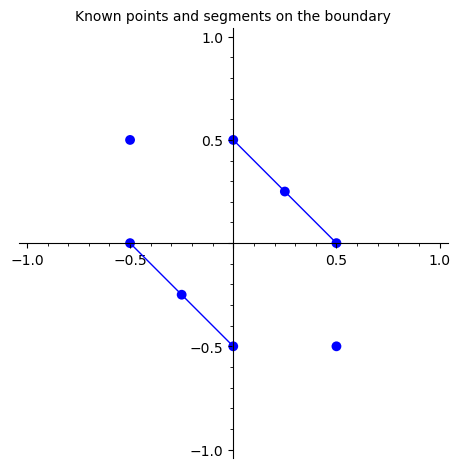

In [31]:
show(
    list_plot([(1/2,0), (-1/2,0), (0,1/2), (0,-1/2),
                (1/4, 1/4), (-1/4, -1/4), (1/2, -1/2), (-1/2, 1/2)],
               aspect_ratio=1, size=50, xmin = -1, xmax = 1, ymin = -1, ymax = 1,
               title = "Known points and segments on the boundary")
    + line([(1/2,0), (0,1/2)])
    + line([(-1/2,0), (0,-1/2)])
)

There's still some ambiguity. Let's test $(2,-1)$.

### v = (2,-1)

We need `n = 18` for the valuations to stabilize:

In [32]:
%time twisted_l2.characteristic(G, (2,-1), cc, 18, (0,2))

Degrees of Laplacians : [4.0, 14.0, 12.0, 2.0]
Valuations            : [0.0, 9.0, 18.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 2.44 s, sys: 13.2 ms, total: 2.46 s
Wall time: 2.46 s


-2

In [33]:
%time twisted_l2.characteristic(G, (2,-1), cc, 19, (0,2))

Degrees of Laplacians : [4.0, 14.0, 12.0, 2.0]
Valuations            : [0.0, 9.0, 18.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -2.0
CPU times: user 2.68 s, sys: 3.12 ms, total: 2.68 s
Wall time: 2.69 s


-2

Let's add the final points to the plot:

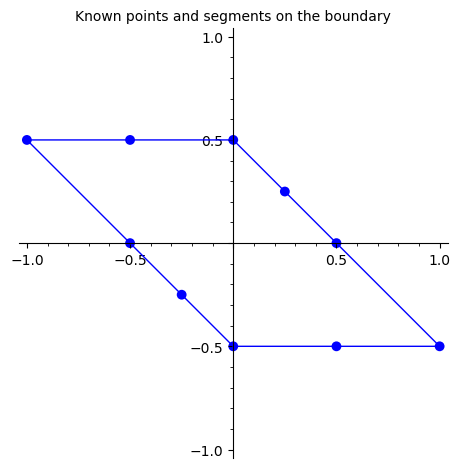

In [36]:
show(
    list_plot([(1/2,0), (-1/2,0), (0,1/2), (0,-1/2),
               (1/4, 1/4), (-1/4, -1/4), (1/2, -1/2), (-1/2, 1/2),
               (1,-1/2), (-1,1/2)],
               aspect_ratio=1, size=50, xmin = -1, xmax = 1, ymin = -1, ymax = 1,
               title = "Known points and segments on the boundary")
    + line([(1,-1/2), (0,1/2), (-1,1/2), (0,-1/2), (1,-1/2)])
)

This also suggests that $(1/4, -1/2)$ is on the boundary, that is, that $(1, -2)$ has twisted $L^2$-Euler characteristic $-4$.

Let's double check:

In [40]:
%time twisted_l2.characteristic(G, (1,-2), cc, 18, (0,2))

Degrees of Laplacians : [4.0, 22.0, 46.0, 6.0]
Valuations            : [0.0, 18.0, 18.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -26.0
CPU times: user 1.84 s, sys: 0 ns, total: 1.84 s
Wall time: 1.84 s


-26

In [41]:
%time twisted_l2.characteristic(G, (1,-2), cc, 24, (0,2))

Degrees of Laplacians : [4.0, 22.0, 34.0, 6.0]
Valuations            : [0.0, 18.0, 24.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -14.0
CPU times: user 3.71 s, sys: 0 ns, total: 3.71 s
Wall time: 3.71 s


-14

In [42]:
%time twisted_l2.characteristic(G, (1,-2), cc, 25, (0,2))

Degrees of Laplacians : [4.0, 22.0, 32.0, 6.0]
Valuations            : [0.0, 18.0, 25.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -12.0
CPU times: user 3.95 s, sys: 0 ns, total: 3.95 s
Wall time: 3.96 s


-12

Still increasing...

In [43]:
%time twisted_l2.characteristic(G, (1,-2), cc, 28, (0,2))

Degrees of Laplacians : [4.0, 22.0, 26.0, 6.0]
Valuations            : [0.0, 18.0, 28.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -6.0
CPU times: user 5.15 s, sys: 0 ns, total: 5.15 s
Wall time: 5.16 s


-6

In [46]:
%time twisted_l2.characteristic(G, (1,-2), cc, 29, (0,2))

Degrees of Laplacians : [4.0, 22.0, 24.0, 6.0]
Valuations            : [0.0, 18.0, 29.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -4.0
CPU times: user 5.74 s, sys: 3.27 ms, total: 5.74 s
Wall time: 5.75 s


-4

In [47]:
%time twisted_l2.characteristic(G, (1,-2), cc, 30, (0,2))

Degrees of Laplacians : [4.0, 22.0, 24.0, 6.0]
Valuations            : [0.0, 18.0, 29.0, 0.0]
Quotient sizes        : [27, 27, 27, 27]
Characteristic        : -4.0
CPU times: user 6.07 s, sys: 3.26 ms, total: 6.08 s
Wall time: 6.09 s


-4

Indeed, the valuations stabilize at `n = 29`, with a return value of $-4$.

### Alexander norm

What is the finite quotient of size $27$?

In [48]:
log_objects = twisted_l2.get_twisted_l2_logs()

In [49]:
[lo.L.StructureDescription() for lo in log_objects]

["C9 x C3", "C9 x C3", "C9 x C3", "C9 x C3"]

It is abelian! Fortunately, it's not a problem here, since the Alexander and Thurston norms are equal.

First, we show that the basis in which `v` is written is dual to the generators of $G$ (call them $a$, $b$):

In [52]:
twisted_l2.make_phi_from_coordinates(G, [1,0], as_list = True)

[1, 0]

In [53]:
twisted_l2.make_phi_from_coordinates(G, [0,1], as_list = True)

[0, 1]

This means that $(\phi_{(1,0)}(a), \phi_{(1,0)}(b)) = (1,0)$ and $(\phi_{(0,1)}(a), \phi_{(0,1)}(b)) = (0,1)$, as we wished.\
Now, we compute the Alexander polynomial of $G$ with respect to the generators:

In [73]:
R.<a,b> = PolynomialRing(QQ)
A = G.alexander_matrix([a,b])

In [74]:
A

[                                     (a^3*b^5 - a^3*b^4 + a^2*b^5 - a^2*b^3 - a*b^2 + a - b + 1)/(a*b^8)                                 (-a^4*b^4 - a^3*b^3 + a^2*b^4 + a^2*b^3 + a^2*b + a^2 - a*b - 1)/(a*b^8)]
[(-a^3*b^5 + a^3*b^4 - a^2*b^5 + a^2*b^4 - a^2*b^3 + a*b^4 + a^2*b^2 - a*b^3 + a*b^2 - a*b + b^2 - b)/a^2                                (a^4*b^4 - a^2*b^4 + a^3*b^2 - a^2*b^3 - a^2*b^2 + a*b^3 - a^2*b + b)/a^2]

In [75]:
apoly = gcd(A.minors(1))
apoly

(a^2*b^2 + a*b^2 + a*b + a + 1)/(a^2*b^8)

In [81]:
support = apoly.numerator().exponents()

In [86]:
newton = Polyhedron(vertices=support)

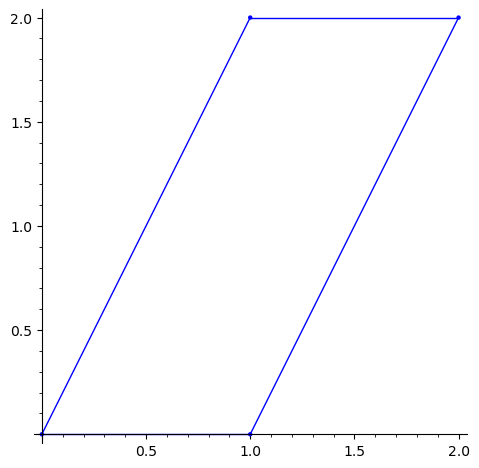

In [87]:
newton.plot(fill="white")

The Newton polytope is dual to the Thurston norm unit ball we just found. Hence, the two norms are equal.